In [1]:
# load some standard libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import math #math fun
import matplotlib.pyplot as plt #plotting
from mpl_toolkits.mplot3d import Axes3D #3d plots


In [2]:
datos=pd.read_csv("/home/tincho/Desktop/osc15-EST-01.csv",sep=";",decimal=",")
datos.head()
imput=datos['R']

In [3]:
datosNP=datos.to_numpy()

In [4]:
Tiempo=np.float64(datosNP[:,0])
Patron=np.float64(datosNP[:,1])
R=np.float64(datosNP[:,2])
T=np.float64(datosNP[:,3])

In [5]:
#filtro la señal
from statsmodels.nonparametric.smoothers_lowess import lowess
plt.rcParams.update({'xtick.bottom' : False, 'axes.titlepad':5})

In [15]:
df_orig = datos
df_loess_5 = pd.DataFrame(lowess(df_orig.R, np.arange(len(df_orig.R)), frac=0.05)[:, 1], index=df_orig.index, columns=['R'])
df_loess_5_T = pd.DataFrame(lowess(T, np.arange(len(df_orig.R)), frac=0.05)[:, 1], index=df_orig.index, columns=['T'])

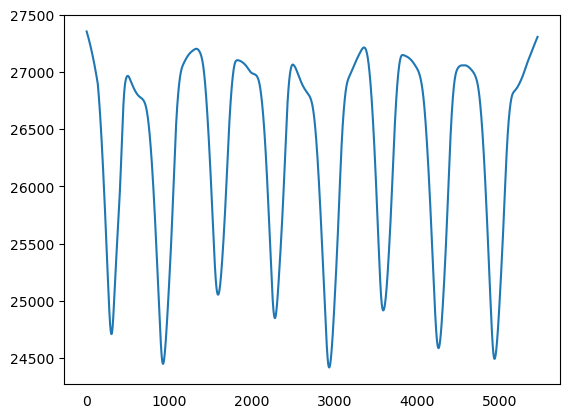

In [7]:
df_loess_5['R'].plot()
plt.show()

In [8]:

from gtda.time_series import TakensEmbedding
from gtda.time_series import SingleTakensEmbedding
import plotly.graph_objects as go
from gtda.plotting import plot_point_cloud


In [9]:
max_embedding_dimension = 30
max_time_delay = 150
stride = 5

embedder_periodic = SingleTakensEmbedding(
    parameters_type="search",
    time_delay=max_time_delay,
    dimension=max_embedding_dimension,
    stride=stride,
)

In [10]:
def fit_embedder(embedder: SingleTakensEmbedding, y: np.ndarray, verbose: bool=True) -> np.ndarray:
    """Fits a Takens embedder and displays optimal search parameters."""
    y_embedded = embedder.fit_transform(y)

    if verbose:
        print(f"Shape of embedded time series: {y_embedded.shape}")
        print(
            f"Optimal embedding dimension is {embedder.dimension_} and time delay is {embedder.time_delay_}"
        )

    return y_embedded

In [25]:
y_periodic_embedded = fit_embedder(embedder_periodic, df_loess_5['R'])

Shape of embedded time series: (916, 7)
Optimal embedding dimension is 7 and time delay is 147


In [26]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
y_periodic_embedded_pca = pca.fit_transform(y_periodic_embedded)
plot_point_cloud(y_periodic_embedded_pca)

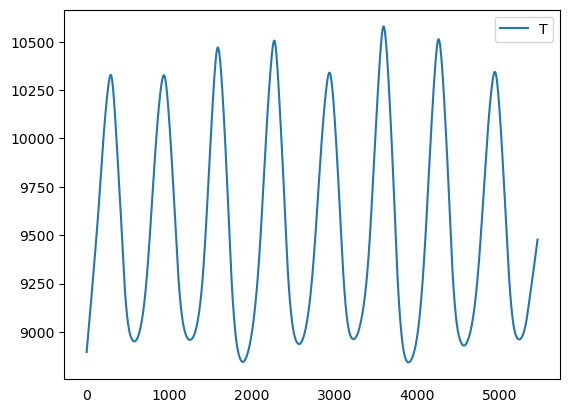

In [17]:
df_loess_5_T.plot()
plt.show()

In [18]:
T_periodic_embedded = fit_embedder(embedder_periodic, df_loess_5_T)

Shape of embedded time series: (912, 7)
Optimal embedding dimension is 7 and time delay is 150


In [19]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
y_periodic_embedded_pca = pca.fit_transform(T_periodic_embedded)
plot_point_cloud(y_periodic_embedded_pca)